
# PS2: Mini-batch SGD, CNN, and RNN

Advanced Learning 2024/5.


Last updated: 2024-12-26


For SUBMISSION:   

Please upload the complete and executed `ipynb` to your git repository. Verify that all of your output can be viewed directly from github, and provide a link to that git file below.

~~~
STUDENT ID: 314757212
~~~

~~~
STUDENT GIT LINK: https://github.com/NatanLishinskyFischer/52025
~~~
In Addition, don't forget to add your ID to the files, and upload to moodle the html version:    
  
`PS2_CNN_RNN_2024_ID_[000000000].html`   




---


Imports:

In [ ]:
import numpy as np # You are allowed to use  only numpy.
import time, sys, cProfile
import matplotlib.pyplot as plt

Please import the objects in `src.py` file into the workspace

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
your_drive_path_to_src_file = "content/src.py"
sys.path.append(your_drive_path_to_src_file)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from src import *

Note that now all of the network's objects from PS1 are loaded into the workspace.

---

### 0. Loading data

As in PS1, you will evaluate your home-made network on the `mnist` dataset.   
The MNIST dataset is a large dataset of handwritten digits that is commonly used for training various image and vision models.  



In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

---

## PS2 Part 1: Mini-batch SGD



**Welcome back**.   






Mini-batch Stochastic Gradient Descent (Mini-batch SGD) is an optimization algorithm used to train machine learning models, particularly neural networks. It strikes a balance between two other methods:

    Batch Gradient Descent – Uses the entire dataset to compute gradients and update the model parameters.
        ✅ Accurate gradients
        ❌ Slow and memory-intensive for large datasets

    Stochastic Gradient Descent (SGD) – Uses a single data point to compute gradients for each update.
        ✅ Fast and efficient
        ❌ Noisy updates, which can lead to instability

  
**Mini-batch SGD**.

Mini-batch SGD computes gradients and updates the model parameters using small, randomly selected batches of data (typically 32, 64, or 128 samples).

    ✅ Faster than batch gradient descent
    ✅ Less noisy than pure SGD
    ✅ Efficient use of memory
    ✅ Enables vectorization for faster computation on GPUs

**How it Works**.

    Shuffle the dataset to avoid bias.

    Divide the data into small batches (e.g., 64 samples per batch).

    For each epoch, iterate through the mini-batches:
        Perform forward pass to calculate predictions.
        Compute the loss for the mini-batch.
        Perform backpropagation to compute gradients.
        Update model parameters using the gradients.

    Repeat until the model converges.

**Algorithm**

For each mini-batch $B={x_1,x_2,...,x_m}B={x_1​,x_2​,...,x_m​}$ of size $m$, update the weights $w$ as:    

$$
w=w−η⋅\frac{1}{m}∑_{i=1}^m ∇L(w,x_i)
$$

Where:   
*  $η$ = learning rate.
* $∇L(w,x_i)$ = gradient of the loss for sample $x_i$.   

Advantages

    Efficient and scalable – Works well with large datasets.
    Smooth convergence – Less noisy than SGD but faster than full batch training.
    Parallelization – Batches can be processed in parallel on GPUs.

Disadvantages

    Choosing batch size can affect performance. Small batches lead to noise, large batches consume more memory.
    Convergence may be slower than batch gradient descent for some problems.


### Mini-batch Questions.
**P1Q1**:  

Please answer the following questions providing statistical justifications and mathematical formulas when needed.

P1Q1a: Explain how the mini-batch size impacts convergence, model performance, and computational efficiency.



Convergence: The larger the size of the mini-batch the more accurate the gradient estimates are. The convergence will be faster per each epoch. However, there is a risk of getting stuck in a local minima. Smaller mini-batches result in more requent updates of the weights, and result in a lower risk for getting stuck in a local minima.

Model performance: The larger the size of the mini-batch the higher the risks for overfitting on the training data, since less noise is demonstrated in the batches. The smaller the size is the the higher the chances for generalization since more noise is introduced to the training. Perhaps even more features and be learned, since the gradients vary across updates.

Computational efficiency: Large mini-batch sizes are suitable for parallel hardware (GPU) that maximize throughput. However, large sizes require more memory. Small sizes will require more frequent weight updates and thus are computationally expensive.

**P1Q1b:**   
Why does mini-batch SGD require a learning rate schedule, and what are the common scheduling strategies?



Mini-batch SGD requires a learning rate schedule because the gradients computed from mini-batches could be somewhat noisy, which can lead to instability and slower convergence if the learning rate remains constant. A schedule allows for larger initial learning rates to enable exploration of the loss landscape, followed by gradual reductions to refine the solution and mitigate noise. There are some examples for common strategies, such as step decay, exponential decay, and cosine annealing. The goal of these strategies is to adjust the learning rate over time to balance speed and stability.

P1Q1c: What role does batch normalization play in mini-batch SGD, and why is it essential for deep neural networks?



Batch normalization is very important in mini-batch SGD by normalizing the inputs to each layer within a mini-batch, ensuring that the mean and variance of the inputs remain stable during training. This reduces internal covariate shift, allowing the network to learn more efficiently and converge faster. It also helps mitigate the impact of vanishing or exploding gradients in deep neural networks.

P1Q1d: How does mini-batch SGD differ in performance compared to full-batch gradient descent when dealing with non-convex optimization problems?



Non-convext optimization problems could be handled more effectively with the mini-batch SGD, compared to the full-batch GD. Mini-batch SGD introduces stochasticity by updating the model parameters based on a subset of the data, which helps it escape saddle points and local minima that are common in non-convex landscapes. In contrast, full-batch gradient descent computes updates using the entire dataset, leading to more deterministic and smoother updates but making it more prone to getting stuck in such points. Additionally, as I've mentioned previously, since the mini-batch SGD is essentially smaller than the full-batch, it is computationally faster per update and allows for more frequent parameter updates, which can lead to quicker convergence in practice.

P1Q1e: How does mini-batch SGD perform when training on imbalanced datasets, and what strategies can mitigate its challenges?



The could be some struggle for mini-batch SGD with imbalanced datasets. Mini-batches could lead to biased gradient updates favoring the majority class and poor generalization for minority classes. To address this, there are some strategies that could be implemented: using weighted loss functions to penalize misclassification of minority classes more heavily, stratified mini-batching to maintain class proportions within each batch, and data augmentation or oversampling to increase minority class representation. Additionally, techniques like focal loss or specialized architectures can focus learning on harder-to-classify examples.

P1Q1f: Explain why larger mini-batch sizes are preferred during inference but not necessarily during training.


In training, smaller mini-batch sizes are often better because they introduce more frequent parameter updates and inject noise into the optimization process, which helps in escaping local minima and improves generalization in non-convex loss landscapes. Larger mini-batches during training can lead to smoother gradient updates but may require a smaller learning rate and higher computational costs, potentially resulting in slower convergence and poorer generalization.
However, during inference, larger mini-batch sizes are preferred because the model parameters are fixed, and there are no gradient updates. This allows the computation to fully utilize hardware resources like GPUs, leading to faster processing of multiple inputs in parallel without concerns about overfitting or convergence issues.

### Applying mini-batch SGD

Preparing the data:

In [ ]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

P1Q2a:  

Add a new function to the class `MyNetwork` named `fit_mini_batch`. This function should be similar to `fit`, just with a mini-batch SGD implementation. You can also make other code changes to the scripts in `src` if you think they are needed. In addition, add a suitable learning rate scheduler of your choice.   


YOU SHOULD (a) add the missing script to the src code, and (b) make a copy of the function  below for review:

In [ ]:
    def fit_mini_batch(self, x_train, y_train, batch_size, epochs, learning_rate):
        """
        Trains the network using mini-batch gradient descent.

        Parameters:
          x_train : np.array
              Training data.
          y_train : np.array
              Training labels.
          batch_size : int
              Size of each mini-batch.
          epochs : int
              Number of training epochs.
          learning_rate : float
              Learning rate for updating the weights.
        """
        num_samples = x_train.shape[0]
        print(f"Training on {num_samples:,} samples using mini-batch SGD:")

        for epoch in range(epochs):
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            x_train = x_train[indices]
            y_train = y_train[indices]

            total_loss = 0
            for i in range(0, num_samples, batch_size):
                X_batch = x_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                batch_loss = 0
                for j in range(len(X_batch)):
                    output = X_batch[j]
                    for layer in self.layers:
                        output = layer.forward_propagation(output)

                    batch_loss += self.loss(y_batch[j], output)
                    grad = self.loss_grad(y_batch[j], output)
                    for layer in reversed(self.layers):
                        grad = layer.backward_propagation(grad, learning_rate)

                total_loss += batch_loss / len(X_batch)

            epoch_loss = total_loss / (num_samples // batch_size)
            print(f"Epoch {epoch + 1}/{epochs}   error={epoch_loss:.6f}")


    Test the two networks below to compare the differences between GD and mini-batch SGD:

In [ ]:
#### GD implementaiton ####

# Network Architecture
netGD = MyNetwork()

netGD.add(Affine_Layer(28*28, 128))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(128, 64))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(64, 10))
netGD.add(ActivationLayer(tanh, tanh_grad))

netGD.use_loss(mse, mse_grad)


epoch_num = 10
lr = 0.05
t1 = time.time()
netGD.fit(x_train[:10000], y_train[:10000], epochs=epoch_num, learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 10,000 samples:
Training epoch 1/10   error=0.042578
Training epoch 2/10   error=0.025901
Training epoch 3/10   error=0.020546
Training epoch 4/10   error=0.017520
Training epoch 5/10   error=0.015454
Training epoch 6/10   error=0.013884
Training epoch 7/10   error=0.012618
Training epoch 8/10   error=0.011560
Training epoch 9/10   error=0.010652
Training epoch 10/10   error=0.009861
Total process time: 93.688


In [ ]:
output_GD = netGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0129, Accuracy: 9395/10000 (94%)



In [ ]:
#### mini-batch SGD implementaiton ####

# Network Architecture
netMiniGD = MyNetwork()

netMiniGD.add(Affine_Layer(28*28, 128))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(128, 64))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(64, 10))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))

netMiniGD.use_loss(mse, mse_grad)

epoch_num = 10
lr_sched = 0.05 # add a learning rate scheduler of your choice here
t2 = time.time()
netMiniGD.fit_mini_batch(x_train[:10000], y_train[:10000], batch_size=128, epochs=epoch_num, learning_rate=lr_sched)
print(f"Total process time: {round(time.time() - t2,3)}")


Training on 10,000 samples using mini-batch SGD:
Epoch 1/10   error=0.043768
Epoch 2/10   error=0.025189
Epoch 3/10   error=0.019321
Epoch 4/10   error=0.015947
Epoch 5/10   error=0.013844
Epoch 6/10   error=0.012251
Epoch 7/10   error=0.011102
Epoch 8/10   error=0.010017
Epoch 9/10   error=0.009153
Epoch 10/10   error=0.008553
Total process time: 91.049


In [ ]:
outputMiniGSD = netMiniGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0151, Accuracy: 9308/10000 (93%)



P1Q2b:   
Please answer the following:
* Which implementation was faster?
* with lower training error?
* with better test accuracy?    

and explain how these results fit your answers in Q1A.

ANSWER.  
    miniGD was slightly faster than SGD (82.36 vs 84.062) and with a slightly lower training error (0.008 vs 0.009). The accuracy was slightly higher in the SGD (0.9391 vs 0.9352). Despite the relatively small differences between the models, these performances fit the answers from Q1A. The convergence was indeed faster in the mini-batch model. However, despite the size of the batch, the generalization was not as good as in GD, hence the lower accuracy in the test set.
    

## PS2 Part 2: CNN



A Convolutional Neural Network (CNN) is a type of a deep neural network that can perform well at image recognition and analysis tasks.


> In this problem set we will add CNN compatibility to our numpy-based neural network from PS 1.

The main components needed to implement a CNN architecture:  

**Convolution layer:** In the convolutional layers, filters are applied to the image to identify patterns and features. Imagine a sliding window that moves across the image, detecting edges, shapes, and other building blocks.  

**Pooling layer:** Pooling layers downsample the data, reducing its complexity and computational cost. This helps prevent overfitting, where the model memorizes training data instead of learning generalizable patterns.  

**Reshape layer:**
Reshaping the output of the convolution and pooling layers into the fully connected layer.   


A USEFUL HINT:

*Keeping account of the input and output shapes along the CNN network is crucial for the model to work as intended*



Useful resource:  
* [CS231](https://cs231n.github.io/convolutional-networks/).
* [Convolutional Neural Network From Scratch](https://www.kaggle.com/code/lusfernandotorres/convolutional-neural-network-from-scratch).
* [CNN with PyTorch](https://www.kaggle.com/code/sdelecourt/cnn-with-pytorch-for-mnist)

#### Data transformations





(Here I added a reshape that I originally intended for you to apply at model time).

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],1,
                          x_train.shape[1],x_train.shape[2])
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
y_train = y_train.reshape(y_train.shape[0],1,
                          y_train.shape[1])

# same for test data : 10000 samples
x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],1,
                          x_test.shape[1],x_test.shape[2])
y_test = to_categorical(y_test)
y_test = y_test.reshape(y_test.shape[0],1,
                          y_test.shape[1])

In [ ]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (60000, 1, 28, 28)
x_test shape (10000, 1, 28, 28)
y_train shape (60000, 1, 10)
y_test shape (10000, 1, 10)


Unlike the multilayer perceptron (MLP) architecture, the input to the convolution net is not flattened. In our case, the size of a single `MNIST` datapoint is (1,28,28). The first dimension is the number of channels (e.g. RGB  for color images). During training the inputs and outputs often  change shape as they pass through the convolution, pooling, and the other layers of the network.

---

### A. Convolution Layer

Here you are asked to implement a basic Convolution layer with the following components:



1.   Layer initialization - initialize the layer's filters using Normalized Xavier/Hu weights
2.   A generator function that yields all the available sliding windows in the input image.
3.   Forward propogation for the convolution layer
4.   Backward propogation for the convolution layer

[CS231](https://cs231n.github.io/convolutional-networks/#conv) provides a great overview both mathematically and visually,   
and [CS230](https://cs230.stanford.edu/section/4/) provides a good overview about Xavier initialization.




P2Q1a:  (10pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.    
You can deviate slightly from the recommended structure below, but please remain true to the class structure and compatibility with the rest of the network classes and functions. The idea here is to write YOUR OWN version of CNN, so please try not to google the answers.





In [ ]:
class Convolution:
    # convolution layer using num_filters x num_filters filters.
    # size is the length/width of the filter window with shape (size x size)
    # In this simple implementation, there is no padding.

    def __init__(self, num_filters=3, size=3, activation=None):
        self.stride = 1 # for simplicity, we keep the stride=1.
        self.size = size
        self.activation = activation
        self.last_input = None

        # Initialize the Convolution layer filters
        self.filters = np.random.randn(num_filters, size, size) / (size * size)

    def patch_generator(self, image):
        # This generator (using yield) returns all the  possible patches of  the input image
        # of shape  (h,w)  for each channel c, together with the relevant y,x coordinates of the patch.
        # input_data/image must be shaped as (c,y,x), where c is the channel/filter
        ch, h, w = image.shape
        for y in range(0, h - self.size + 1, self.stride):
            for x in range(0, w - self.size + 1, self.stride):
                patch = image[:, y:y + self.size, x:x + self.size]
                yield patch, y, x

    def forward_propagation(self, image):
        # Calculate the convolution forward pass using the filters together with a
        # user specified activation function.

        # If this is the first convolution layer, the input image is size (h,w) and must be expanded to (c,h,w).
        if len(image.shape)==2:
            image = np.expand_dims(image, axis=0)
        # keep track of last input for later backward propagation
        self.last_input = image
        # Initializing the output array:
        input_dimension = image.shape[1]  # Assuming square input (h = w)
        output_dimension = input_dimension - self.size + 1  # Output size after convolution layer

        # compute output dimensions after the convolution layer
        output = np.zeros((self.filters.shape[0], output_dimension, output_dimension))

        # forward pass on each filter
        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(image):
                 output[f,y, x] =  np.sum(patch * self.filters[f])


        # Applying activation function (this is a small cheat/simplification
        #  because the activation should be a separate layer in itself.  )
        if self.activation is not None:
            output = self.activation.forward_propagation(output)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the SGD in-gradients of the filters and the layer.
        # Update only the filters gradients.

        # back propagate through activation (again, a bit of a cheat)
        if self.activation is not None:
            grad_out = self.activation.backward_propagation(grad_out,learning_rate)

        grad_in = np.zeros_like(self.last_input)
        grad_filter = np.zeros_like(self.filters)


        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(self.last_input):
                grad_filter[f] += grad_out[f, y, x] * patch[0]
                grad_in[:, y:y + self.size, x:x + self.size] += grad_out[f, y, x] * self.filters[f]

            self.filters -=  grad_filter * learning_rate

        return grad_in    # return the loss gradient for this layer's inputs


### B. Max-pooling Layer

As with the convolution layer, here you are asked to implement a basic max-pooling layer with the following components:


1.   A generator function that yields all the available sliding windows in the input image. You can reuse the generator from (1).
2.   Forward propogation for the max-pooling layer
3.   Backward propogation for the max-pooling layer

The pooling layer is responsible for reducing the dimensionality of the input. As with the convolution layer, the pooling layer slides a filter across the entire image input to calculate the output. Note that this layer does not have any weights.  As the filter slides through the input image, it selects the pixel with the maximum value to populate the output array.

P2Q1b: (10pts).       

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [ ]:
class MaxPool:
    def __init__(self,  size=2):
        # max pooling layer

        self.last_input = None
        self.stride = 1
        self.size = size

    def patch_generator(self, image):
        # returns a generator (using yield) of all  possible patches of size size x size
        # input_data/image must be shaped as (c,y,x)
        ch,h,w = image.shape

        for c in range(ch):
          for y in range(0,h-self.size+1):
              for x in range(0,w-self.size+1,self.stride):
                  patch = image[c, y:y + self.size, x:x + self.size]
                  yield patch, c, y, x

    def forward_propagation(self, image):
        # keep track of last input for later backward propagation
        self.last_input = image

        # compute output dimensions after the max pooling
        num_channels, h_prev, w_prev = image.shape
        h_new = (h_prev - self.size)  + 1
        w_new = (w_prev - self.size)  + 1
        # hold the values of the max pooling
        output = np.zeros((num_channels, h_new, w_new))

        # Calculate the max pool on all the image patches using the generator:
        for patch, c, y, x in self.patch_generator(image):
            output[c ,y, x] = np.max(patch)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the gradients of the last input image
        num_channels, orig_dim, *_ = self.last_input.shape
        grad_in = np.zeros(self.last_input.shape)

        # Using the generator, go over all the channels and calcualte the max-pooling input gradients
        # for c in range(num_channels):
        for patch, c, y, x in self.patch_generator(self.last_input):
            (x, y) = np.unravel_index(np.nanargmax(patch), patch.shape)
            grad_in[c, y * self.stride + y, x * self.stride + x] += grad_out[c, y, x]

        return grad_in


### C. Reshape Layer

A reshape layer in a neural network is a transformation layer that doesn't perform any computations itself (no weights).   
Its purpose is to simply change the dimensionality (shape) of the data flowing through the network.

Here's how reshape layers work:

You define a target shape for the output of the reshape layer.   
This target shape specifies the number of elements along each dimension (width, height, channels, etc.) for the new data format.

P2Q1c:  (5pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [ ]:
class Reshape:
    def __init__(self,input_shape,output_shape):
        self.input_shape=input_shape
        self.output_shape=output_shape
    def forward_propagation(self,input_data):
        return np.reshape(input_data, self.output_shape)

    def backward_propagation(self,output_gradient,learning_rate=None):
        # you can ignore the learning_rate
        return np.reshape(output_gradient, self.input_shape)

### Testing Your Neural Network

### Defining our main neural network architecture

Define your CNN network's architecture:

* A convolution layer with some filters `(f)` and a window size of `(w x w)`, with a `tanh` activation function.
* A max pooling layer of a window size of `(p x p)`.  
* First affine layer that takes your input and outputs 128 nodes
* `tanh` activation layer following the first affine layer
* Second affine layer that takes the first layer's input and outputs 64 nodes
* `tanh` activation layer following the second affine layer
* Third affine layer that takes your second layer's input and outputs nodes in the size of the Y labels.
* `tanh` activation layer following the last affine layer


You can compute the shapes of the convolution and max-pool layers' outputs  as a function of the input shape, the convolution sliding window size, and the number of filters for applied. ( the stride and padding are usually also used to calculate the output shapes, but in this simple implementation we set the stride to 1 with zero padding.).

P2Q2a: (5pts).        
Calculate the input and output shapes of each layer in the network below, up until the first affine layer (including).  (mathematically) explain your answer.  


ANSWER HERE

The input shape of the network starts at (1,12,26,26), and after the convolution layer with 12 filters of size 3×3, stride 1, and no padding, the output spatial dimensions are calculated as (𝐻′,𝑊′)=((𝐻−𝐾+1)/stride, (𝑊−𝐾+1)/stride) = (24, 24), giving an output shape of (1,12,24,24).

P2Q2b:  (5pts).   

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the network architecture works properly.  





In [ ]:
# Network Architecture
CNNnet = MyNetwork()
num_classes = 10

H,W = 26, 26
c = 12
x_new = H
y_new = W

CNNnet.add(Convolution(num_filters=12, size=3, activation=ActivationLayer(relu, relu_grad)))
CNNnet.add(Reshape((c,y_new,x_new),(1,c*y_new*x_new)))
CNNnet.add(Affine_Layer(c*y_new*x_new, 128))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(128, 64))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(64, num_classes))
CNNnet.add(ActivationLayer(tanh, tanh_grad))

### Training!

There is no need to train the model on the entire dataset (you'l see why now...). Try to prove that your network works as expected by showing that your error decreases dramatically even on a small sample (say, around 1k).

In [ ]:

# While developing, it is recommended to train your model on a subset of the data... / or low epochs.
# Training will be pretty slow if we update at each iteration on 60000 samples...]
CNNnet.use_loss(mse, mse_grad)
epoch_num = 20 #20
lr = 0.1
t1 = time.time()
CNNnet.fit(x_train[:1000], y_train[:1000], epochs=epoch_num,
           learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 1,000 samples:
Training epoch 1/20   error=0.082818
Training epoch 2/20   error=0.058689
Training epoch 3/20   error=0.051252
Training epoch 4/20   error=0.046699
Training epoch 5/20   error=0.042869
Training epoch 6/20   error=0.039042
Training epoch 7/20   error=0.035451
Training epoch 8/20   error=0.032202
Training epoch 9/20   error=0.029167
Training epoch 10/20   error=0.026328
Training epoch 11/20   error=0.023727
Training epoch 12/20   error=0.021300
Training epoch 13/20   error=0.019082
Training epoch 14/20   error=0.017023
Training epoch 15/20   error=0.015158
Training epoch 16/20   error=0.013434
Training epoch 17/20   error=0.011872
Training epoch 18/20   error=0.010472
Training epoch 19/20   error=0.009240
Training epoch 20/20   error=0.008160
Total process time: 4779.581


Hurray - if you got to this point, your CNN model works, but is EXTREMELY slow.   
Let's check why using a cProfiler:

In [ ]:
CNNnet.prof(x_train[:100], y_train[:100],epochs=4,learning_rate=lr)


Training on 100 samples:
Training epoch 1/4   error=0.007807
Training epoch 2/4   error=0.005021
Training epoch 3/4   error=0.003529
Training epoch 4/4   error=0.002753
         29250181 function calls in 113.764 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6499200    7.885    0.000    7.885    0.000 <ipython-input-16-42fa15642bd2>:15(patch_generator)
      400   14.657    0.037   40.716    0.102 <ipython-input-16-42fa15642bd2>:25(forward_propagation)
      400   64.713    0.162   69.253    0.173 <ipython-input-16-42fa15642bd2>:53(backward_propagation)
      400    0.002    0.000    0.011    0.000 <ipython-input-18-81dabbadbef6>:5(forward_propagation)
      400    0.003    0.000    0.010    0.000 <ipython-input-18-81dabbadbef6>:8(backward_propagation)
        1    0.000    0.000  113.764  113.764 <string>:1(<module>)
      400    0.010    0.000    0.028    0.000 _methods.py:101(_mean)
      400    0.008    0.000    0.0

P2Q2c:  (5pts).     
Why do you think our CNN implementation is slow? Your answer should relate to the  approximate `O(n)` time/computational complexity .

The slowness of the CNN implementation could be attributed to the complicated computational complexity of the convolutional layer and the fact that we implement fully connected affine layers. This takes approximately O(N*f*w*w*H*W) where N is the number of images we pick for training, f is the number of filters of sizes w*w and H and W are the height and the width of the output.

### Evaluation

Exciting! Now is the time to test your model.     


    May the gradients be always in your favor.

P2Q2b (cont'd):

**Try to limit the number of epochs and the size of the trained data, while still achieving an accuracy score of >85%.**

In [ ]:
output = CNNnet.predict(x_test[:500] ,y_test[:500] )


Test set: Avg. loss: 0.0521, Accuracy: 417/500 (83%)



### Benchmarking against PyTorch

How well your model performs against a similar-architecture PyTorch model?   
It is time to find out:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset

**Prepare the data as tensors using PyTorch DataLoader:**

In [ ]:
t_train =  TensorDataset(torch.Tensor(x_train),torch.Tensor(y_train).squeeze(1))
t_test =  TensorDataset(torch.Tensor(x_test),torch.Tensor(y_test).squeeze(1))
train_loader = torch.utils.data.DataLoader(dataset=t_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=t_test, batch_size=64, shuffle=False)

Define a `PyTorchCNN` class with an identical architecture you used in your home-made network.  
Hint: use `x = x.view()` to handle reshapes.

P2Q3a: (5pts).   

In [ ]:
class PyTorchCNN(nn.Module):
    def __init__(self):
        super(PyTorchCNN, self).__init__()
        input_size = (1,28,28)

        num_filters = 12  # Number of filters in the convolution layer
        filter_size = 3   # Convolution filter size (3x3)
        pool_size = 2     # Pooling window size (2x2)
        stride = 1
        h_conv = input_size[1] - filter_size + 1
        w_conv = input_size[2] - filter_size + 1
        h_pool = (h_conv - pool_size) // stride + 1
        w_pool = (w_conv - pool_size) // stride + 1

        flattened_size = num_filters * h_pool * w_pool

        self.conv1 = nn.Conv2d(input_size[0], num_filters, kernel_size=filter_size)
        self.pool = nn.MaxPool2d(kernel_size=pool_size, stride=stride)
        self.l1 = nn.Linear(flattened_size, 128)
        self.l2 = nn.Linear(128, 64)
        self.l3 = nn.Linear(64, 10)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.conv1(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.tanh(self.l1(x))
        x = self.tanh(self.l2(x))
        x = self.tanh(self.l3(x))

        return x


In [ ]:
# Train the model
num_epochs = 10
pt_learning_rate = 0.01
pt_network = PyTorchCNN()
optimizer = torch.optim.Adam(pt_network.parameters(), lr=pt_learning_rate)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        # labels = labels.view(64,1,10)
        outputs = pt_network(images)
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # A handy printout:
        if (i + 1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [500/938], Loss: 0.0954
Epoch [2/10], Step [500/938], Loss: 0.0964
Epoch [3/10], Step [500/938], Loss: 0.0938
Epoch [4/10], Step [500/938], Loss: 0.0953
Epoch [5/10], Step [500/938], Loss: 0.0976
Epoch [6/10], Step [500/938], Loss: 0.0997
Epoch [7/10], Step [500/938], Loss: 0.0952
Epoch [8/10], Step [500/938], Loss: 0.1090
Epoch [9/10], Step [500/938], Loss: 0.0971
Epoch [10/10], Step [500/938], Loss: 0.1036


Evaluation:

In [ ]:
pt_network.eval()
test_losses = []
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = pt_network(data)
        test_loss += criterion(output, target,)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.max(1,keepdim=True)[1]).sum()

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))


Test set: Avg. loss: 0.0015, Accuracy: 974/10000 (10%)



P2Q3b (5pts).   

Time for some questions:
1. Which one of the models performed better? Why?
2. Which one of the models performed faster? Why?  
3. What would you change in your network's architecture?   
4. What would you change in your model's solution algorithm?

Write your solutions here:

1.   The PyTorch implementation performed better in terms of accuracy and generalization due to better optimizations, such as efficient gradient calculations, pre-implemented layers, and more stable numerical operations.
2.   The PyTorch implementation performed much faster because PyTorch is optimized for performance with efficient back-end libraries like cuDNN and MKL, which leverage GPU acceleration and optimized matrix operations. In contrast, the custom implementation suffers from higher computational overhead due to unoptimized layer implementations, lack of parallel processing, and inefficient memory management. PyTorch's use of batching, multi-threading, and highly efficient tensor operations further reduces execution time compared to a naive custom implementation.
3.   The are several changes to consider, for example to use ReLU instead of tanh, since it is computationally cheaper. We could also add batch normalization to achive better generalization.
4.   We could use modern optimizers like Adam for better convergence instead of relying on basic gradient descent. We could also implement minibatch training to balance memory usage and training speed.





## PS2 Part 3: RNN

In this part we are going to implement a simple time-series prediction using RNN on a noisy simulated funcitonal data.

There are two main goals in time series prediction:

**Understanding the data:** This involves identifying the patterns and trends that exist in the data over time.    
By understanding these patterns, we can gain insights into the underlying processes that generate the data.    
For instance, time series analysis might reveal seasonal trends in sales data or cyclical patterns in stock prices.

**Forecasting future values:** This is the more commonly recognized goal of time series prediction.   
By leveraging the patterns and trends identified in the data, we can make predictions about what the data will look like in the future.   
This can be helpful for tasks like planning inventory levels, managing financial risk, or predicting weather patterns.

**Recurrent Neural Networks (RNNs)** are a powerful tool for time series prediction because they can handle the sequential nature of time series data.   Unlike traditional neural networks, RNNs have internal memory that allows them to consider past information when making predictions. This is particularly useful for time series data where the value at any given point in time is often influenced by past values.

*Here's a breakdown of how RNNs are used for time series prediction:*

The Model Architecture:

* A typical RNN model for time series prediction consists of an input layer, one or more hidden layers with special RNN cells (like LSTM or GRU), and an output layer.
The hidden layers process the data sequences.   
* Each cell in the hidden layer receives the current input and the output from the previous cell in the sequence. This allows the network to consider past information.

**The Training Process:**

* The RNN is trained on historical time series data. The model is presented with sequences of data points, and it learns to predict the next value in the sequence.  
* During training, the RNN uses backpropagation through time (BPTT), a variant of the standard backpropagation algorithm, to adjust its internal parameters and improve its prediction accuracy.

### Simulating data



> In this example, each training step ($t$) consists of a sequence of target data of length $k$ ($t-k:t$), and a training sequence of the same length, but with a lag ($t-k-l:t-l$). Our RNN should predict the target sequence using the lagged training sequence.



We simulate cyclical data using a function of `sin` and `cos`:

*   As is, the output of our function is cyclical (recurring) in `t`.
*   We also add a `sin` shift (`np.sin(s)`) that adds a small drift between steps.
* Our target is defined as: $y(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) $
*   Our training data (without lag) is defined as:



$$y_{\alpha}(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) + N(0,1)*\alpha$$

Image that we only observe the noisy training data and the target, without having any insight into the generating function.

P3Q1 (10pts)  
Fill out the missing code according to the function definition above

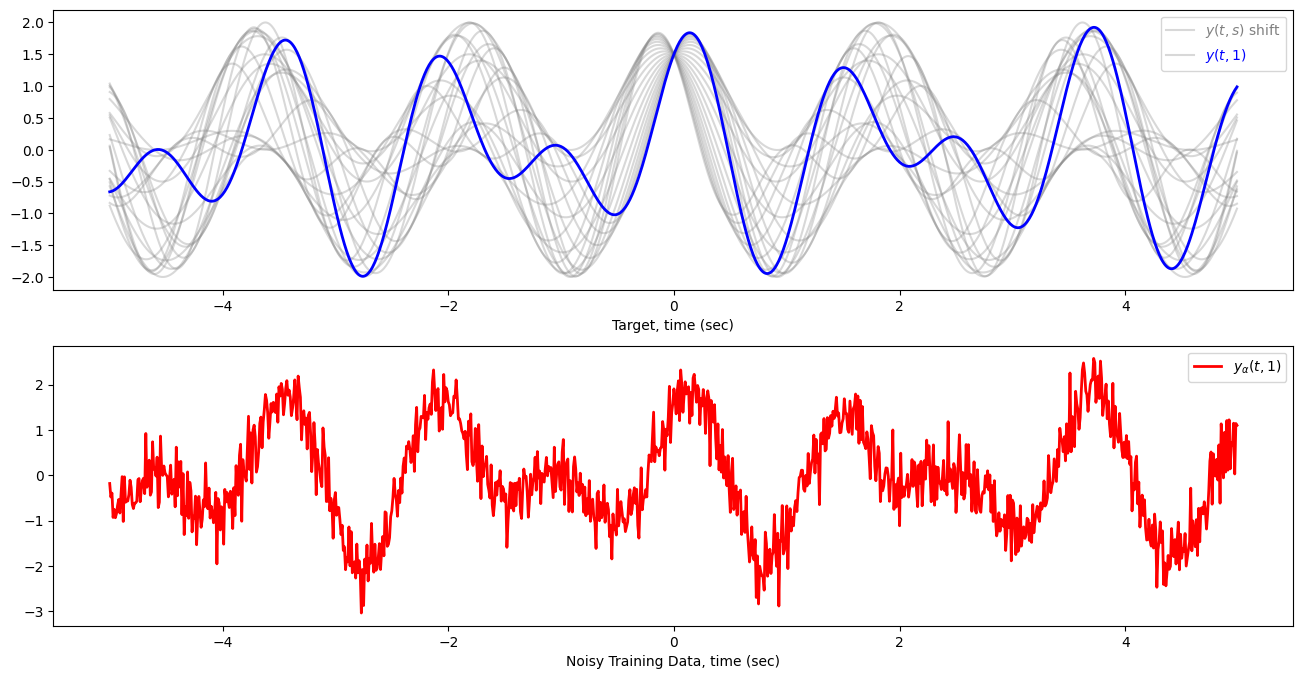

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## SOLUTION REQUIRED IN THIS BLOCK ##

## Plotting simulated functional data

t_line = np.arange(-5., 5., 1/100.)  # time line space
alpha = 0.4

## Creating a function to produce cyclical y data.
def y_func(s):
    return np.sin(np.sin(s) * 2 * np.pi * t_line + np.pi / 6) + np.cos(2 * np.sqrt(3) * t_line)

y = y_func(1)  # target at s=1

## Adding noise
noise = alpha * np.random.randn(len(t_line))  # Add some noise
y_noisy = y + noise  # Noisy version of the training data

## Plotting
fig, ax = plt.subplots(2, 1, figsize=(16, 8))
fval = np.arange(-1, 1, 0.1)

# Plot multiple shifted versions of the function to show the cyclical behavior
for i in fval:
    ax[0].plot(t_line, y_func(i), color='gray', alpha=0.3, label="$sin(f)$ shift")

ax[0].plot(t_line, y, lw=2, label="fixed $f$", color="b")
ax[0].set_xlabel('Target, time (sec)')

ax[1].plot(t_line, y_noisy, lw=2, c="r")
ax[1].set_xlabel('Noisy Training Data, time (sec)')

ax[0].legend(["$y(t,s)$ shift", "$y(t,1)$"], labelcolor=["gray", "b"])
ax[1].legend(["$y_{\\alpha}(t,1)$"])

plt.show()


In the figure above we can see the true output of the generating function, given a specific value of $s$ (blue), and various drifts according to different values of $s$ (gray).  In the bottom plot you can see the noisy data (training),  matching the blue graph in the top plot.

### Creating PyTorch RNN model

Here we create a basic PyTorch RNN class (inherits from `nn.Module`).  

* *input_size* – The number of expected features (dimensions) in the input t

* *hidden_size* – The number of features in the hidden state h

* *num_layers* – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.    

* batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states.




For more information, please check the
[PyTorch nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN) documentation.


In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # Adding a fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden


In [ ]:

# RNN Hyperparameters
input_size=1 # our data is 1-dim
output_size=1
hidden_dim=16
n_layers=2

# instantiate an RNN model
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


### RNN Training

Now we need to define a training function that takes the following hyper-parameters:  

* rnn : the RNN model object
* n_steps = on how many steps ($t$) to train the model (equivalent to "epochs").
* lag = the steps/datapoints lag between the training and target data.
* alpha = how much noise to add to the training data
* seq_length = how many datapoints  (time-series steps) to consider in each "epoch": $(t-k:t)$
* stride = the window size of the function (of which the seq_length will be divided).
* print_every = how often (in steps) to print a plot of the prediction against the target.

At each step, we have a lagged value of x, noisy lagged value of x (training), and a value of y (target not lagged).

P3Q2:  (5pts)

Fill out the missing code according to the function definition above

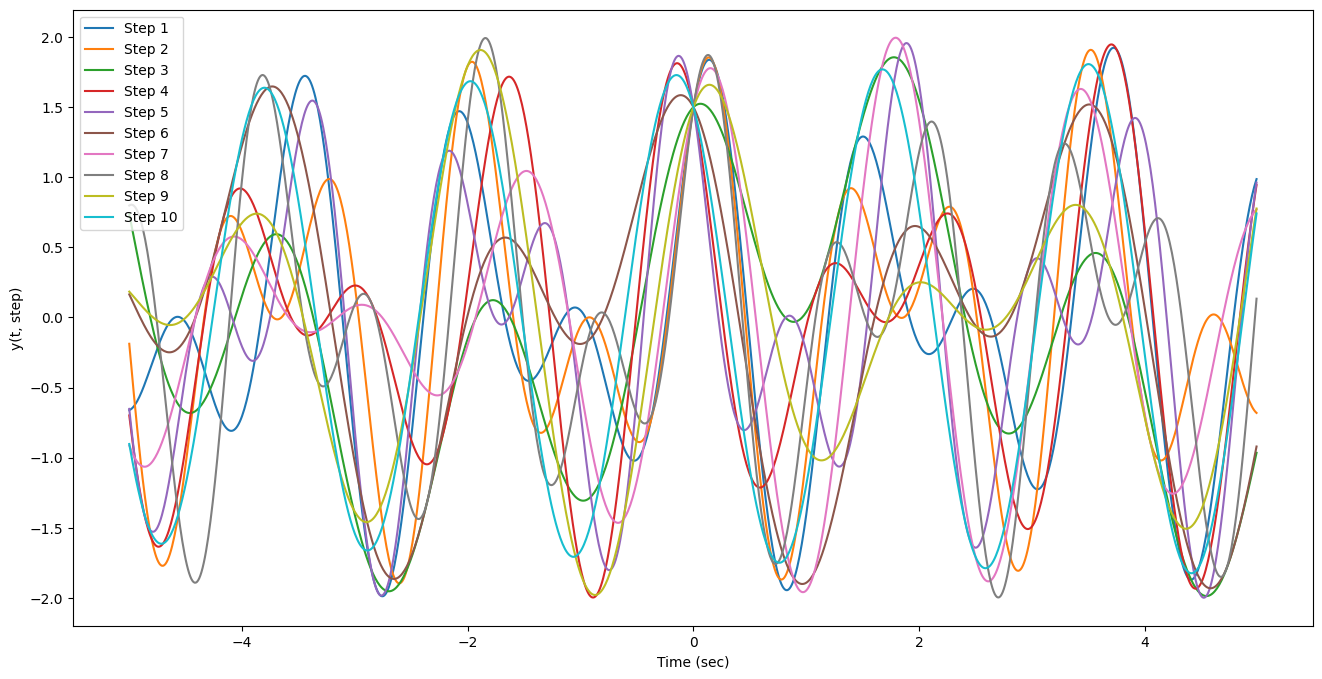

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def y_func(step, x_line):
    return np.sin(np.sin(step) * 2 * np.pi * x_line + np.pi / 6) + np.cos(2 * np.sqrt(3) * x_line)

x_line = np.arange(-5., 5., 1/100.)  # time line space
steps = np.arange(1, 11, 1)  # Simulate 10 steps

y_data = []
for step in steps:
    y_data.append(y_func(step, x_line))

fig, ax = plt.subplots(figsize=(16, 8))

for step, y in zip(steps, y_data):
    ax.plot(x_line, y, label=f"Step {step}")

ax.set_xlabel('Time (sec)')
ax.set_ylabel('y(t, step)')
ax.legend()

plt.show()


In [ ]:
# train the RNN
def train(rnn,y_func, n_steps, print_every,stride,seq_length,
          alpha,lag):
    # initialize the RNN hidden state
    hidden = None
    s = 1 # initialize f
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data

        # t_line = np.linspace(y_func(s,step),y_func(s,step)+stride,seq_length+stride)
        t_line =  np.linspace(step,step+stride, seq_length)
        data = y_func(s,t_line)
        noisy_data =  data + np.random.randn(len(t_line))*alpha
        # update f
        s += 0.05

        # prepare data for training
        data.resize((seq_length , 1)) # input_size=1
        noisy_data.resize((seq_length , 1)) # input_size=1
        # creating a lag in the noisy data aginst y
        x = noisy_data[:-lag]
        y = data[lag:]

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero out gradients
        optimizer.zero_grad()
        # calculate backprop and update weights
        loss.backward()
        optimizer.step()

        # plot loss and predictions
        if batch_i%print_every == 0:
            plt.plot(t_line[lag:], x, 'r.',label = "training")
            plt.plot(t_line[lag:], y, 'b.',label = "actual")
            plt.plot(t_line[lag:], prediction.data.numpy().flatten(), 'y.',label= "prediction") #
            plt.title("Loss: {:,}".format(loss.item()))
            plt.legend(loc="upper left")
            plt.show()

    return rnn

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

    
Train the RNN model on various hyper-parameters (defined below) and review the results.   


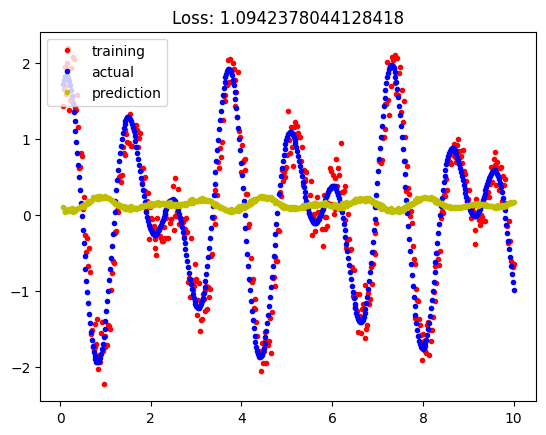

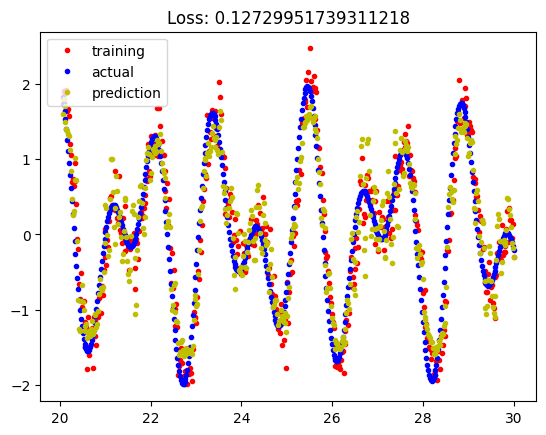

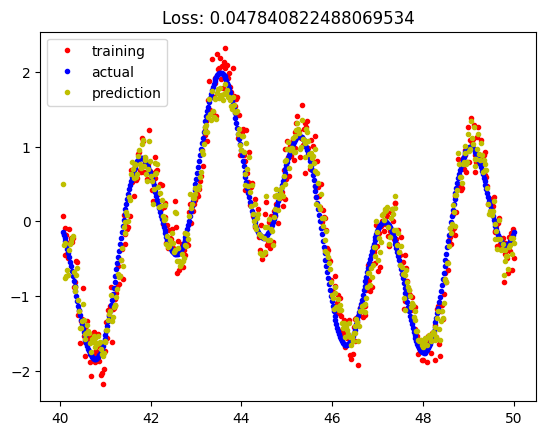

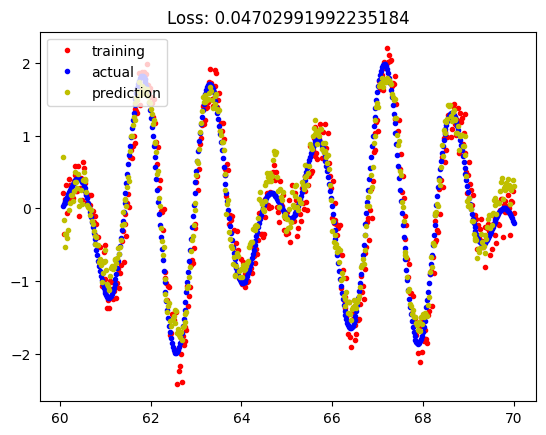

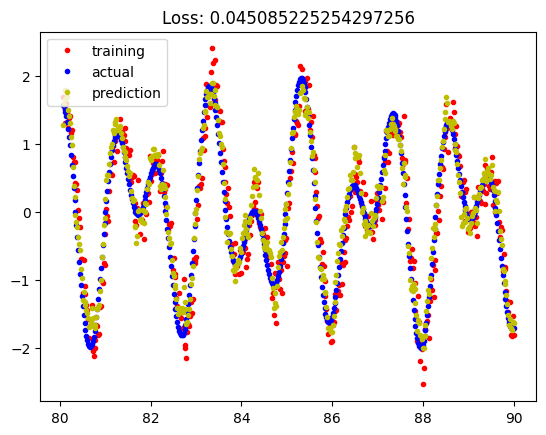

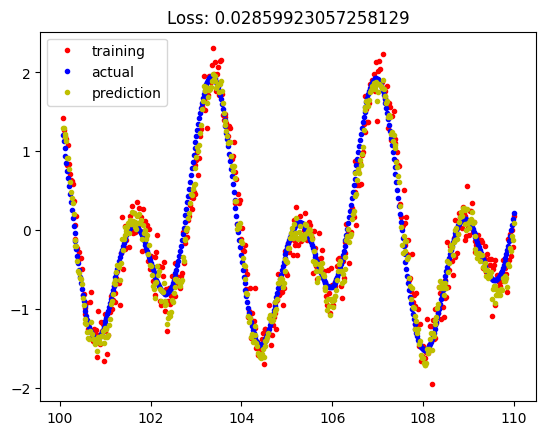

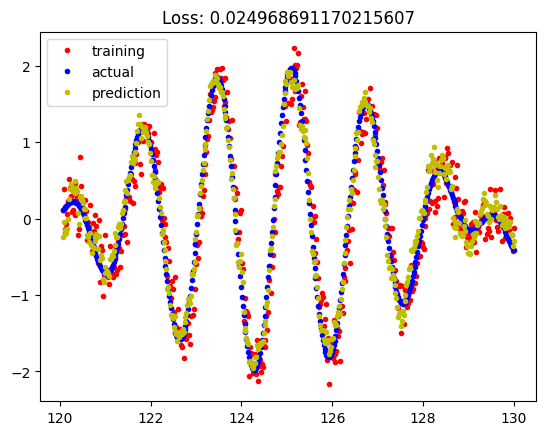

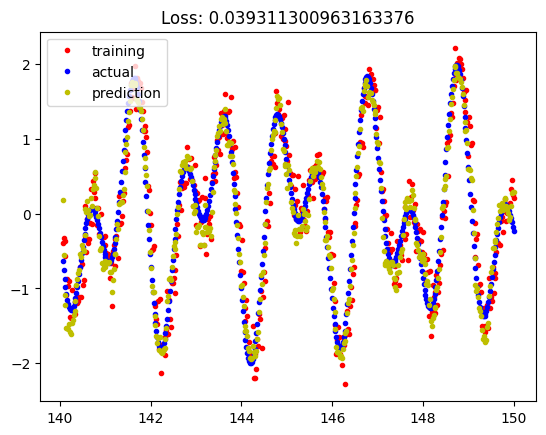

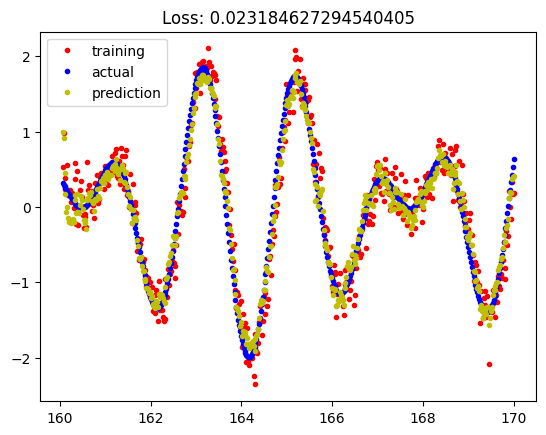

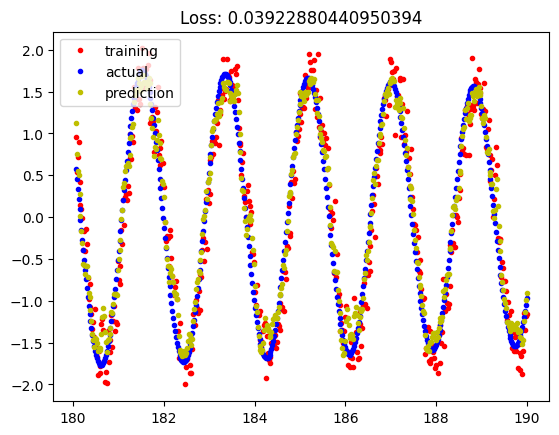

In [ ]:

# train the rnn and monitor results

n_steps = 200
stride = 10
lag = 3
alpha = 0.2
seq_length = 500
print_every = 20

trained_rnn = train(rnn, y_func,  n_steps, print_every,
                    stride,seq_length,alpha,lag)

P3Q3: (10pts)

(a) Do you think our model performs well?     
(b) Write about the relationships and interplay between the different hyper-parameters, and explain how they effect the RNN model. Please relate also to the RNN architecture in our solution.

(c) Can you give a real world example where this type of model can be applied?   
(d) What would you change to improve it?

Write your solution here!

1.   The model’s performance is not bad. It seems to capture patterns and it doesn't seem to overfit.
2.   Hyperparameters like sequence length, hidden units, learning rate, and batch size interact to affect the model's ability to learn patterns. For instance, a longer sequence length captures more temporal dependencies but increases computational cost. Similarly, hidden units impact the model’s capacity. Learning rate influences convergence speed, and batch size affects gradient stability.
3.   This type of RNN model can be applied in forecastings of the stock market, where cyclic patterns variations are prevalent.
4.   To improve the model, using advanced architectures like LSTM can address vanishing gradient issues and enhance the learning of long-term dependencies. Hyperparameter tuning, dropout for regularization, and gradient clipping can stabilize training.





THE END!